In [1]:
NAME = "Robina Shaheen"
DATE = "07052020"
COLLABORATORS = ""

 <img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

Earth Analytics Education

# Climate Change and Wildfires in California
The rising carbon dioxide in the atmosphere is contributing to constant increase in global temperatures. Over the last two decades, humanity has observed record-breaking extreme weather events. A comparison with the historical data indicates higher frequency,  larger magnitude, longer duration, and timing of many of these events around the world has also changed significantly (Seneviratne et al., 2018). Wildfires are no exception, as seen in the recent years, devastating blazes across the globe (Amazon forest in 2019, California 2017-18 and Australia in 2019-2020. In the western U.S., wildfires are projected to increase in both frequency and intensity as the planet warms (Abatzoglou and Williams, 2016). For example, warming trends are expected to result in increased lightning strikes (Romps et al., 2014).
The state of California with ~ 40 million residents and ~ 4.5 million housings and properties has experienced the most devastating economic, ecological and health consequences during and after wildfires (Baylis and Boomhower, 2019; Liao Y and Kousky C, 2020,).

## Motivation and Goals of the Study
Historical efforts to assess the impacts of wildfire have primarily focused on readily available metrics, such as the number of acres burned, the number of lost structures, the number of responding personnel, the costs of fire suppression and response, and in some cases, the value of lost timber. This information, however, provides only a partial view of the total economic impacts of wildlfire because it does not take into account the long-term impacts of wildfires on ecosystem and affected populations such as children and adults with respiratory and cardio-vascular diseases.

This goal of this study is to understand the consequences of wildfires on the atmospheric chemistry and how we can predict toxic gases and particulate matter in the air during and after wildfires. This will allow us to plan and mitigate disastrous and long term health consequences. 
I have laid out this study in multiple sections:
1. Understanding weather pattern using advanced machine learning tools to identify certain markers that can be used to assess potential wildfires events.
2. Understanding changes in the chemical composition of the atmosphere during wildfires.
3. Identify relationship between ozone and fine particulate matter using machine learning algorithms as both these pollutants can trigger respiratory stress and cardio-vascular diseases.


# Workflow
1. Import packages and modules 
2. Import datetime conversion tools beteween panda and matplotlib for time series analysis
3. Download air quality data from the EPA website
4. Set working directory to "earth-analytics" 
5. Define paths to download data files from data folder 'sd_fires_2014'
6. Import data into dataframes using appropriate functions(date-parser, indexing, remove missing values)
    * Daily weather data from EPA website  Jan-Dec. 2014
    * Daily data on the atmospheric gases and particulate matter Jan - Dec. 2014
    * Monthly precipitation data (2007-2020) San Diego, CA. 
7. view nature and type of data 
8. Use Scikit learn multivariate analysis to predict ozone levels.
9. Plot rain data to view anomalies in precipitation and relationship with wildfires .
10. Conclusions and future outlook. 

## Import Packages/ modules and set working directory

In the cells below packages/modules were imported needed to analyze data and create plots. 


In [2]:
# Import packages/ modules
import os
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
import earthpy as et
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import datetime
from textwrap import wrap
from statsmodels.formula.api import ols

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Scikit learn to train model and make predictions.
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

# Set Working Directory
ea_path = os.path.join(et.io.HOME, 'earth-analytics')

# Set base path to download data
base_path = os.path.join(ea_path, "data")
base_path

'C:\\Users\\bina_\\earth-analytics\\data'

# Overview of Data  
The Environmental Protection Agency of the US provide data for the all the state and it is a large data set, often slowing the processing time. Therefore, it is important to carefully select data required only to check air quality and weather conditions for specific state or county. I have selected ozone, oxides of nitrogen and carbon monoxide, fine particulate matter that are produced during wildfires for San Diego County. These dataset combined with the weather data will allow me to understand the effects of wildfires on the air quality in San Diego County.

## Data Sources

* Environmental Protection Agency, USA. <a href="https://https://www.epa.gov/outdoor-air-quality-data//" target="_blank">EPA website/ User Guide to download data</a>.

* Precipitation Record (2007-2020), San Diego, CA. <a href="http://www.wx4mt.com/wxraindetail.php?year=2020//" target="_blank"> San Diego Weather, CA</a>.

## Spatial and Temporal Resolution

Weather data and atmospheric composition acquired from the EPA website and it has daily resolution for these stations.
Monitoring stations of San Diego County: 

Chula Vista, El Cajon, Del Mar, Escondido, Alpine,
Camp Pendleton South, San Diego downtown, Otay Mesa.

The daily measurements for all these stations ware combined to facilitate data handling and analysis.

Ozone data is provided as 8hour daily average for all these stations, though ozone concentration peaks at midday when solar intensity is high.


In [3]:
# Define relative path to files
file_path1 = os.path.join(base_path, "output_figures", 
                          "sandiego_2014_fires", "air_quality_csv",
                          "sd_weather_2014_mean_values_only.csv")
file_path2 = os.path.join(base_path, "output_figures", 
                           "sandiego_2014_fires", "air_quality_csv",
                           "sd_chemical_composition_2014_mean_v02.csv")
file_path3 = os.path.join(base_path,"output_figures","sandiego_2014_fires", "air_quality_csv",                     
                         "sd_combined_data_2014_mean_values_only.csv")


# To check if path is created
os.path.exists(file_path1)
os.path.exists(file_path2)

True

In [4]:
# Import csv files into dataframe and ensure date time is imported properly.
sd_weather_2014_df = pd.read_csv(file_path1, parse_dates=['Date Local'],
                                 index_col=['Date Local'])
sd_weather_2014_df.head(3)

,T (oF),RH (%),P (mb),wind (mph)
Date Local,,,,
2014-01-01,55.489583,42.916666,999.845833,90.233565
2014-01-02,58.156250,40.027778,998.504167,84.944213
2014-01-03,57.661458,44.597222,996.229167,81.395833


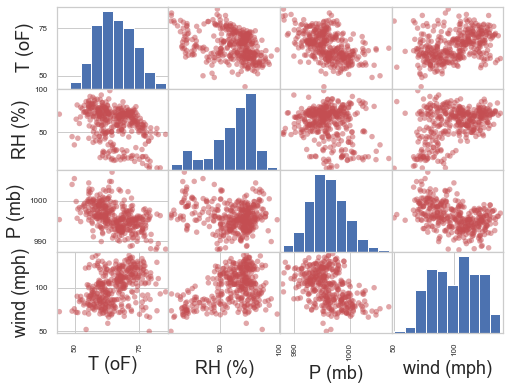

In [5]:
# Use pandas scatter matrix function to view relationships between various components of weather system.
pd.plotting.scatter_matrix(sd_weather_2014_df, s=30, figsize=[
                            8, 6], marker='o', color='r')

# plt.title('Figure 1. A comparison of correlation of weather pattern with histogram')
# plt.tight_layout()

plt.show()

The figure above shows a Gaussian distribution of temperature and pressure, whereas relative humidity data is skewed towards lower humidity levels.The wind pattern shows two distinct populations. Both relative humidity and wind pattern indicates extreme weather changes during Santa Ana events. The correlation matrix graph shows inverse correlation between temperature and relative humidity. One can easily identify how extremely low relative humidity (<30%) can easily damage shrubs and other vegetations. The inverse relationship between pressure, temperature and winds is obvious from these graphs. A time series data has already shown that a high resolution record of temperature, relative humidity and wind can be used as a useful indicator of wildfire season.

## Exploring Relatioship of Ozone with Weather Conditions

The temperature is inversely proportional to  pressure and  relative humidity.  So we will explore relationship of these parameters with the ozone concentration. 
Wind speed showed no clear correlation with temperature and relative humidity.

Ozone is a strong oxidant and toxic gas. It enters directly into the respiratory system and may damage lungs. 

In [6]:
sd_df3 = pd.read_csv(file_path3,
    parse_dates=["Date Local"],
    usecols=["Date Local","Temp_mean", "RH_mean", "Pres_mean","O3_ppb_mean"],
    index_col=['Date Local'])
sd_df3.rename(columns = {'Temp_mean':'T (oF)', 'RH_mean':'RH (%)', 
                              'Pres_mean':'P (mb)',
                        "O3_ppb_mean":'O3 (ppb)', 
                       }, inplace = True) 


sd_df3.head(2)

,T (oF),RH (%),P (mb),O3 (ppb)
Date Local,,,,
2014-01-01,55.489583,42.916666,999.845833,22.278182
2014-01-02,58.156250,40.027778,998.504167,18.205909


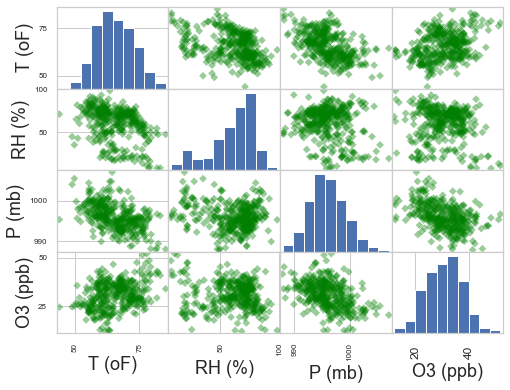

In [7]:
# Plot scatter matrix of weather with ozone
pd.plotting.scatter_matrix(sd_df3, 
                           s=30, figsize = [8,6], marker='D', 
                           color = 'green', alpha = 0.4,
                           label = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10},);
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tick_params(labelsize=12, pad=6)
plt.show()

In the figure above ozone shows a weak positive correlation with the temperature meaning more ozone is produced at high temperature. The figure also shows a weak inverse correlation between ozone and pressure meaning ozone is destroyed at higher pressure.

#  Scikit-learn

In this section I will  explore how ozone concentration vary with the oxides of nitrogen, carbon monoxide and particulate matter. These pollutants are produced during wildfires at a much higher levels and affect human health.

I will use Scikit-learn for predictive data analysis.

Scikit-learn is powerful tool designed for machine learning in python and built on NumPy, SciPy, and matplotlib.

In [8]:
sd_atm_df = pd.read_csv(file_path2, parse_dates=['Date Local'],
                                index_col=['Date Local'])
sd_atm_df.head(2)
sd_atm_df.columns

Index(['O3_ppm_mean', 'O3 (ppb)', 'NO2 (ppb)', 'PM2.5 (ug/m3)', 'CO_ppm',
       'CO (ppb)'],
      dtype='object')

In [9]:
sd_atm_df.describe()

,O3_ppm_mean,O3 (ppb),NO2 (ppb),PM2.5 (ug/m3),CO_ppm,CO (ppb)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.030693,30.693122,10.490526,10.493389,0.403001,403.001442
std,0.006991,6.990947,6.042576,4.754778,0.189696,189.696481
min,0.011977,11.977000,2.655821,2.066667,0.153409,153.409000
25%,0.025705,25.704818,5.732708,7.730729,0.260755,260.754833
50%,0.030571,30.571100,8.517046,10.026191,0.344201,344.200500
75%,0.035479,35.478700,13.773292,12.513799,0.512228,512.228500
max,0.052010,52.010000,32.668723,60.135417,1.017736,1017.736333


# Multiple Linear Regression 

## Holy grail in atmospheric chemistry: ozone prediction in polluted environment.

The Ozone formation and decomposition depends on the release of pollutants and atmospheric conditions. These parameters have shown large variations during wildfires. 
In this section I will Scikit-learn to predict ozone concentrations with all the criteria pollutants

Linear regression involving multiple variables is called “multiple linear regression” or multivariate linear regression. The steps to perform multiple linear regression are almost similar to that of simple linear regressions. 

The difference lies in the evaluation. We can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.

In [10]:
# To check empty columns, False means no empty colums
sd_atm_df.isnull().any()

O3_ppm_mean      False
O3 (ppb)         False
NO2 (ppb)        False
PM2.5 (ug/m3)    False
CO_ppm           False
CO (ppb)         False
dtype: bool

In [11]:
# If any column show "true" in the code above, 
# We can remove all the null values from that column using this code.
sd_atm_df = sd_atm_df.fillna(method='ffill')

## Selecting Data for Training the model
Divide the data into “attributes” and “labels”.
Here X variable contains all the attributes/features and y variable contains labels.

we will split 80% of the data to the training set while 20% of the data to test set using below code. The test_size variable is where we actually specify the proportion of the test set.

In [12]:
# selected data frame for training
X = sd_atm_df[[ 'NO2 (ppb)','CO_ppm', 'PM2.5 (ug/m3)']].values
y = sd_atm_df['O3 (ppb)'].values

In [13]:
# random state is used to seed for data training
indices = sd_atm_df.index.values
X_train, X_test, y_train, y_test, idx1, idx2 = train_test_split(
    X, y, indices, test_size=0.2, random_state=0)

In [14]:
# Training Algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

33.395895011457256
[-0.4457463  -0.79214025  0.20259138]


In [16]:
y_pred = regressor.predict(X_test)
X_test
# print(y_pred)
type(y_pred)

numpy.ndarray

In [17]:
### During ML we have used numpy array and now converting it to dataframe. 
df2 = pd.DataFrame({'Date': idx2, 'Actual': y_test, 'Predicted': y_pred})
df2.head(2)

# Set index on date to identify anomalous events in the plot.
df3 = df2.set_index('Date')
df3.index = df3.index.date

# df3 = df2.set_index('Date')
df3.head(3)

,Actual,Predicted
2014-04-17,39.496778,33.963768
2014-09-17,29.229364,31.405086
2014-02-15,24.700636,25.743098


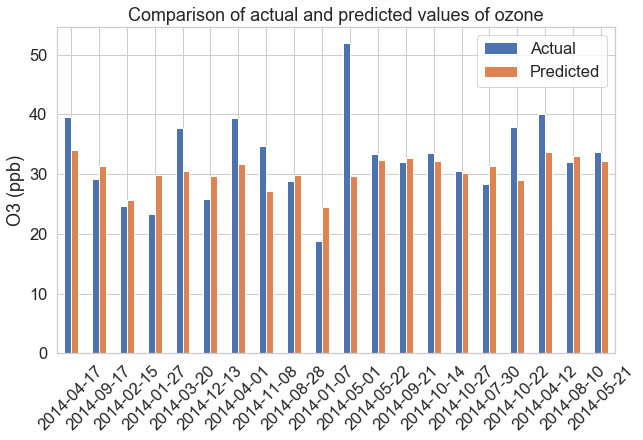

In [18]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 6))

# printing only 20% values
df3 = df3.head(20)
df3.plot(ax=ax, kind='bar')

# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Comparison of actual and predicted values of ozone')
plt.ylabel('O3 (ppb)')
# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

# plt.savefig('data/output_figures/sandiego_2014_fires/air_quality_csv/O3_multivariate_analysis.png')
plt.show()

In [19]:
# Results:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.175979035211536
Mean Squared Error: 42.42135163302012
Root Mean Squared Error: 6.513167557572899


# Conclusion
1. The ozone prediction from model = (6.51/30.69)*100 ~ 20% less than actual value. It is a remarkable result as ozone formation and destruction is a complex third order reaction.  

2. A comparison of actual and predicted values indicated large deviations during wildfires and rainy days. During wildfires, model predicted lower ozone values and during rain days,model predicted higher ozone values. 

3. Future models with weather conditions and fire chemistry may improve models predictions.

4. The ozone fromation depends on temperature, pressure and destruction with OH radical, photolysis and collisions with air molecules.  The data for one of the important source of ozone formation Volatile Organic Compounds (VOC) is incomplete and there is a possibility it may reduce errors in the ozone prediction model.
5. A preliminary comparison of pollutants data with precipitation record revealed an interesting story that good rainy season in 2010 resulted in huge biomass accumulation in San Diego. In the following three year (2011-13)low precipitation converted most of the biomass (shrubs, grasses)into dry fuel which is ideal to kindle fire. 

# Relevance of Ozone to Future Climate 
Our data indicated that ozone concentration increases at higher temperature.
Ozone concentration also increases with NOx and CO which are produced during fossil fuel burning. 
This means urban population with more traffic will be constantly exposed to higher ozone levels.
Ozone levels also increase during wildfires as biomass burning also release NOX and CO. 
In a changing climate NOx, CO and volatile organic compounds are expected to increase and hence ozone formation will continue to increase with climate change.

# Future Outlook
There are many exciting avenues to expand this work to more wildfire events and comparison with weather and atmospheric conditions to test our model.

Future studies should include comprehensive weather data, atmospheric chemistry and precipitation events to predict pollutants during wildfires in California and elsewhere where high resolution data on these parameters is available.

**Figure . cumulative rain and number of rainy days in San Diego California, USA.**

<img src="http://drive.google.com/uc?export=view&id=12tON_T9EbfuwqyTGbNwcp60P65VEaHov" width="400" height="200">

The figure above shows that precipitation in 2010 was more than normal and resulted in rapid growth of shrubs, grasses and other vegetations which later served as tinder for fires in early 2014. The black line indicates exponential decrease in precipitation after heavy rains in 2010. Tinder is an easily combustible material (dried grass and shrubs) and is used to ignite fires. The black line indicates exponential decrease in precipitation after heavy rains in 2010. A further analysis of rain pattern in 2020 indicated 110mm of rain in Dec. 2020 which is almost half of the annual rain in San Diego. There was no rain from July-Aug. 2020 after deadly wildfires. It would be interesting to study how high ozone and particulate matter affected health of locals. 

With changing climate and frequent wildfires populations are suffering not only from the immediate impact of wildfires but lingering effects of fine particulate matter and toxic gases. The harmful effects of these pollutant especially  children and individuals with respiratory diseases (Amy Maxman 2019) will become more prevalent in a hotter world.

# References
Abatzoglou, T. J., and Williams P. A., Proceedings of the National Academy of Sciences Oct 2016, 113 (42) 11770-11775; DOI: 10.1073/pnas.1607171113

Seneviratne, S. et al., ,Philos Trans A Math Phys Eng Sci. 2018 May 13; 376(2119): 20160450, doi: 10.1098/rsta.2016.0450

Baylis, P., and  Boomhower, J., Moral hazard, wildfires, and the economic incidence of natural disasters, Posted: 2019, https://www.nber.org/papers/w26550.pdf

Liao, Yanjun and Kousky, Carolyn, The Fiscal Impacts of Wildfires on California Municipalities (May 27, 2020). https://ssrn.com/abstract=3612311 or http://dx.doi.org/10.2139/ssrn.3612311 

Amy Maxman, California biologists are using wildfires to assess health risks of smoke. Nature 575, 15-16 (2019),doi: 10.1038/d41586-019-03345-2
